In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

### This notebook is related to the topic of modelling separated flows by modifying formulas for forces and moments.

### It continues topic of validation for steady state. Cases 1.1.-3.1. are recalculated, but this time using angle of attack not effective angle of attack to calculate fsep value.

## 1.1. SD7003, comparison with Xfoil

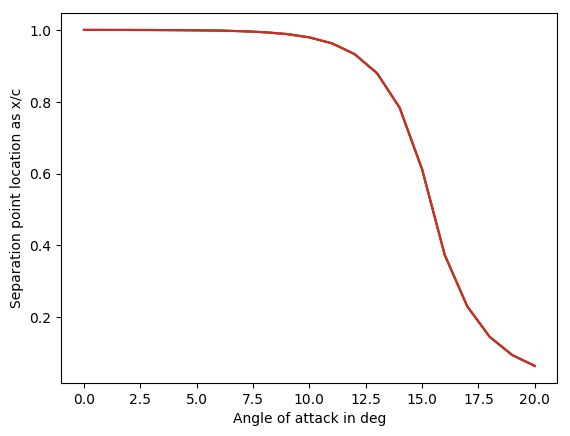

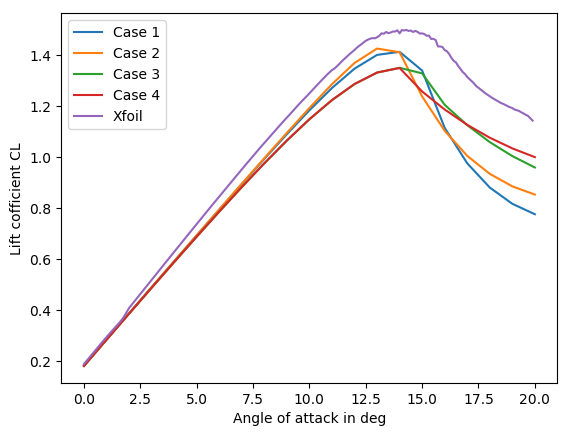

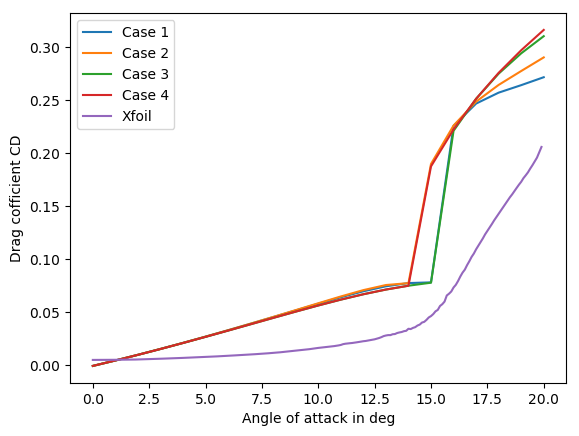

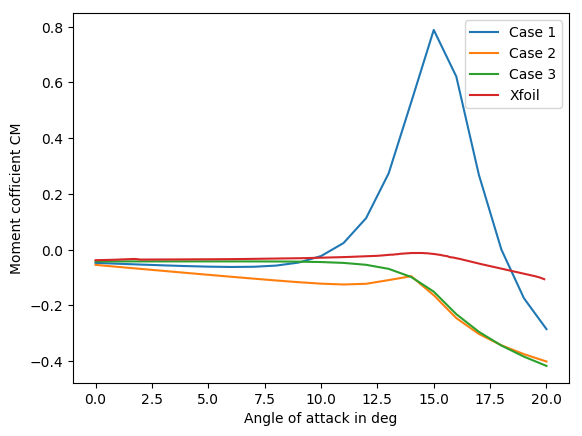

PyObject <matplotlib.legend.Legend object at 0x7f70e500d160>

In [2]:
sepdef1 = SeparationParams(15.05,1.71,1.92,"Sheng",aoa="AoA", k0=-0.03, k1=-0.12, k2=0.86, m=0.9)
sepdef2 = SeparationParams(14.35, 1.10, 2.32, "Original", aoa="AoA", k0=-0.07, k1 = -0.011, k2=0.07, m=1.89)

sepdef3 = SeparationParams(15.0, 3.10, 3.37, "Sheng", aoa="AoA")
sepdef4 = SeparationParams(14.1, 3.07, 3.7,"Original", aoa="AoA")


sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

nsteps = 700
alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
xfoil = Xfoil("xfoil_sd7003_CN.txt");

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#LIFT COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CL, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

#DRAG COEFFICIENT
figure()
for case= 1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,7,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CD, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Drag cofficient CD")
legend()

#DRAG COEFFICIENT
figure()
for case= 1:3
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,8,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CM, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Moment cofficient CM")
legend()

## 1.2. SD7003, comparison with experiment

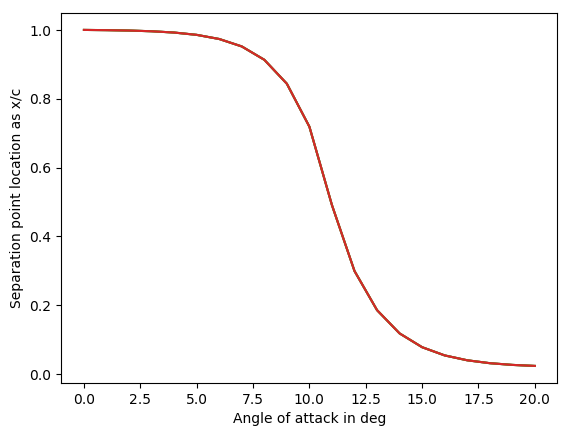

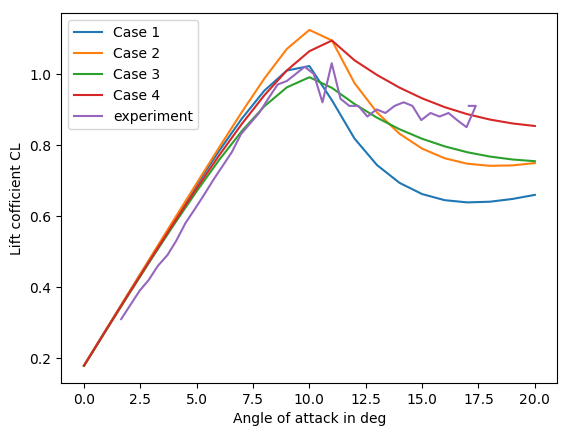

PyObject <matplotlib.legend.Legend object at 0x7f70e4db35c0>

In [3]:
sepdef1 = SeparationParams(10.6,1.71,1.92,"Sheng",aoa="AoA")
sepdef2 = SeparationParams(11.0, 1.10, 2.32, "Original", aoa="AoA")
sepdef3 = SeparationParams(10.6, 3.10, 3.37, "Sheng", aoa="AoA")
sepdef4 = SeparationParams(11.0, 3.07, 3.7,"Original", aoa="AoA")


sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
data = readdlm("exp_sd7003_CL.txt",skipstart=1)
alpha = data[:,1]
CL = data[:,2]

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#LIFT COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case], label="Case $case")
end
plot(alpha, CL, label="experiment")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

## 2.1. NACA 0012, comparison with Xfoil

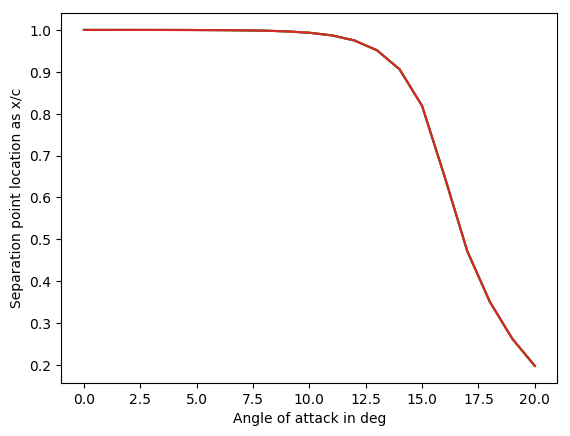

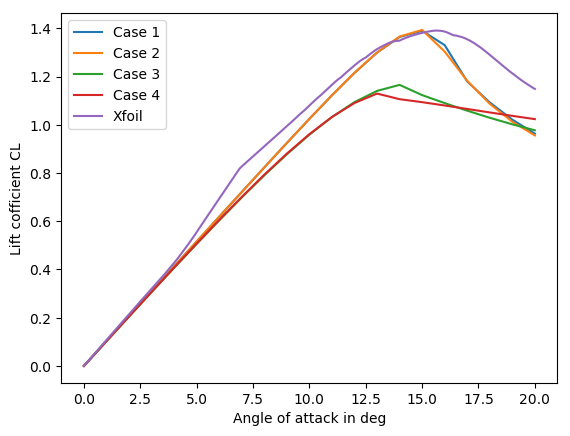

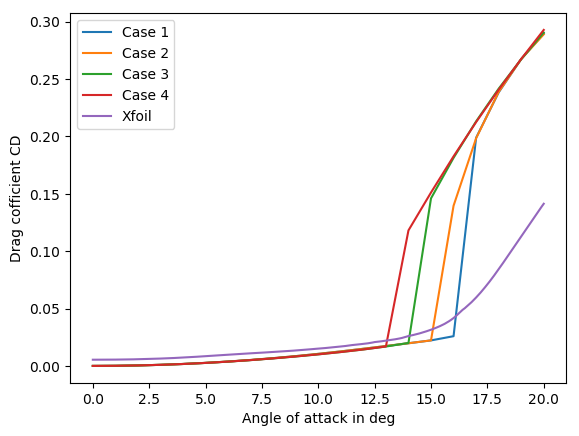

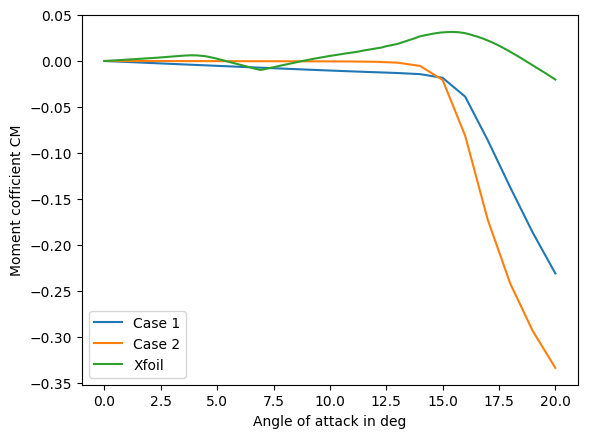

PyObject <matplotlib.legend.Legend object at 0x7f131ba9c8d0>

In [6]:
nsteps = 700
sepdef1 = SeparationParams(16.2,1.52,3.21,"Sheng",aoa="AoA", k0=-0.01, k1=-0.04, k2=0.06, m=0.9)
sepdef2 = SeparationParams(15.8, 1.52, 2.87, "Original", aoa="AoA")
sepdef3 = SeparationParams(14.5, 4.07, 4.84, "Sheng", aoa="AoA")
sepdef4 = SeparationParams(13.1, 3.66, 5.68,"Original", aoa="AoA")

sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("n0012.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
xfoil = Xfoil("xfoil_0012_CN.txt");

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#LIFT COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CL, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

#DRAG COEFFICIENT
figure()
for case= 1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,7,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CD, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Drag cofficient CD")
legend()

#MOMENT COEFFICIENT
figure()
for case= 1:2
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,8,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CM, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Moment cofficient CM")
legend()

## 2.2. NACA 0012, comparison with experiment [2]

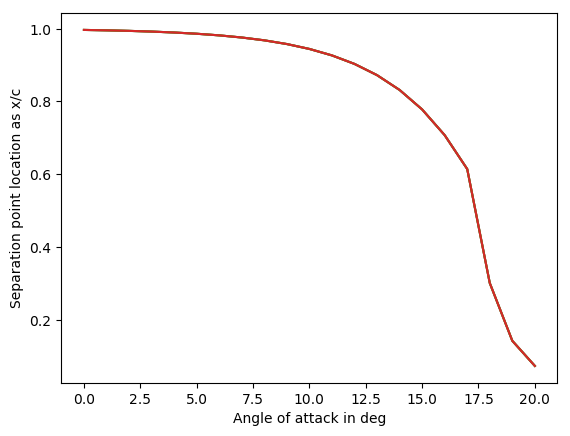

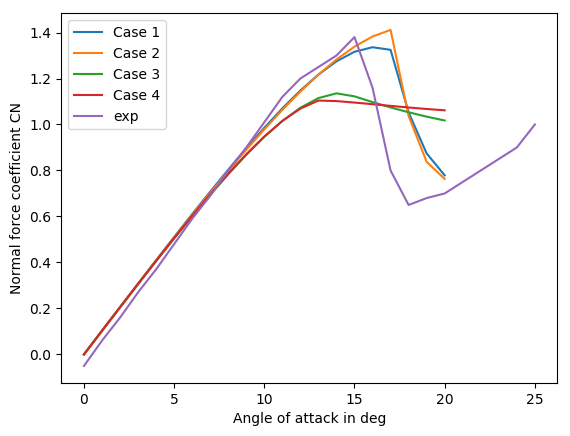

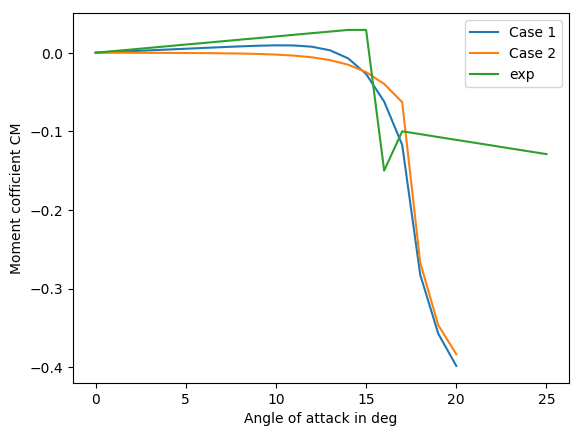

PyObject <matplotlib.legend.Legend object at 0x7f1322c79898>

In [7]:
sepdef1 = SeparationParams(17.13,3.62,1.20,"Sheng",aoa="AoA", k0=0.01, k1=-0.17, k2=0.04, m=2.56)
sepdef2 = SeparationParams(17.13, 4.86, 0.89, "Original", aoa="AoA")
sepdef3 = SeparationParams(14.5, 4.07, 4.84, "Sheng", aoa="AoA")
sepdef4 = SeparationParams(13.1, 3.66, 5.68,"Original", aoa="AoA")

sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("n0012.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
data = readdlm("exp_0012_CN.txt",skipstart=1)
alpha = data[:,1]
CN = data[:,2]
CM = data[:,3]

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#NORMAL FORCE COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case].*cos(mat_case[end,2,:,case]).+mat_case[end,7,:,case].*sin(mat_case[end,2,:,case]), label="Case $case")
end
plot(alpha, CN, label="exp")
xlabel("Angle of attack in deg")
ylabel("Normal force coefficient CN")
legend()

#MOMENT COEFFICIENT
figure()
for case= 1:2
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,8,:,case], label="Case $case")
end
plot(alpha, CM, label="exp")
xlabel("Angle of attack in deg")
ylabel("Moment cofficient CM")
legend()

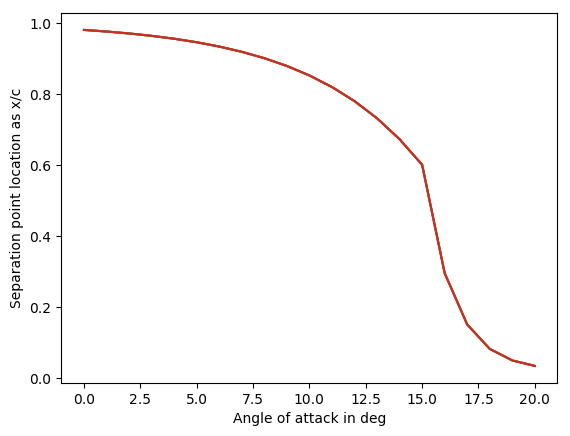

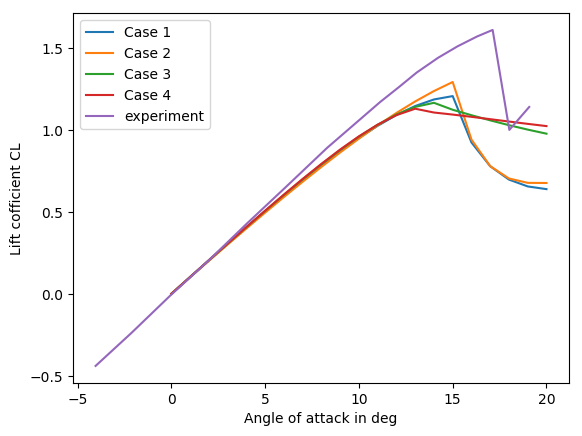

PyObject <matplotlib.legend.Legend object at 0x7f1322cd43c8>

In [8]:
sepdef1 = SeparationParams(15.0,5.05,1.34,"Sheng",aoa="AoA")
sepdef2 = SeparationParams(15.0, 7.56, 1.12, "Original", aoa="AoA")

sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("n0012.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
data = readdlm("exp_0012_CL.txt",skipstart=1)
alpha = data[:,1]
CL = data[:,2]

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#LIFT COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case], label="Case $case")
end
plot(alpha, CL, label="experiment")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

## 3.1. NACA 0015, comparison with Xfoil

In [2]:
sepdef1 = SeparationParams(17.0, 2.12,4.00,"Sheng",aoa="AoA", k0=-0.01, k1=-0.01, k2=0.046, m=1.00)
sepdef2 = SeparationParams(16.5, 2.17, 3.54, "Original", aoa="AoA")
sepdef3 = SeparationParams(15.3, 3.52, 5.65, "Sheng", aoa="AoA")
sepdef4 = SeparationParams(13.5, 2.45, 7.13,"Original", aoa="AoA")

sepdef = [sepdef1 sepdef2 sepdef3 sepdef4]

alphamax = 20
no_of_cases = length(sepdef)

mat_case = zeros(nsteps,9,alphamax+1,no_of_cases)

for k = 1 : no_of_cases

        for iter = 1:alphamax+1

            alphadef = ConstDef((iter-1)*pi/180)
            hdef = ConstDef(0.)
            udef = ConstDef(1.)#Freestream velocity is a constant. Set as constant = 1

            #The full kinematics are collected as:
            full_kinem = KinemDef(alphadef, hdef, udef)

            pvt = 0.25
            lespcrit = [5.;] #Note that the value is entered as an array. 

            # The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
            #in the same folder. For eg. "sd7003.dat". 
            #The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
            surf = TwoDSurf("naca0015.dat", pvt, full_kinem,lespcrit)

            curfield = TwoDFlowField()
            #Specify simulation details - time step, and number of steps.
            #The default nondimensional timestep is 0.015. There is usually no need to change this. 

            #Now the code is run as :
            #The variables mat, surf and curfield are returned
            dtstar = 0.015
        
            mat, surf, curfield = ldvm_klb(surf, curfield,sepdef[k], nsteps, dtstar)
            mat_case[:,:,iter, k]=mat        
        end
end 

# Load data from Xfoil
xfoil = Xfoil("xfoil_0015_CN.txt");

# Compare forces and moment coefficients

# Separation point location
for case = 1:no_of_cases
    plot(mat_case[end,2,:,1]*180./pi,mat_case[end,9,:,1], label ="Case $case")
end
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

#LIFT COEFFICIENT
figure()
for case =1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,6,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CL, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Lift cofficient CL")
legend()

#DRAG COEFFICIENT
figure()
for case= 1:no_of_cases
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,7,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CD, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Drag cofficient CD")
legend()

#MOMENT COEFFICIENT
figure()
for case= 1:2
    plot(mat_case[end,2,:,case]*180./pi,mat_case[end,8,:,case], label="Case $case")
end
plot(xfoil.alpha, xfoil.CM, label="Xfoil")
xlabel("Angle of attack in deg")
ylabel("Moment cofficient CM")
legend()

LoadError: UndefVarError: nsteps not defined